In [1]:
import numpy as numpy
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\hp\Desktop\netflix\Data\mymoviedb.csv',engine='python') #engine='python' is used to handel large files

In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


vote_count & vote_average is miss read as object/strings , convert it to float

In [22]:
 numeric_columns = ['Vote_Count', 'Popularity', 'Vote_Average']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [6]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [11]:
df.duplicated().sum() #no duplicate value

0

In [23]:
df.describe()
  #it gives basic stats of the rows having numbers

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9826.000000,9826.000000
mean,40.320570,1392.943721,6.439467
std,108.874308,2611.303856,1.129797
min,7.100000,0.000000,0.000000
25%,16.127500,146.000000,5.900000
50%,21.191000,444.000000,6.500000
75%,35.174500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


1. there is a gap after comma in genre, this should be removed during preprocessing
2. change the realease date from string to date time formate
3. remove 3 column, "overview", "original_language", "poster_url"

In [25]:
print(df['Release_Date'][~pd.to_datetime(df['Release_Date'], errors='coerce').notnull()])


1106              - Just Desserts
1107            - If The Hue Fits
1108                    - Dust Up
1109     - Scents And Sensibility
1110      - Just One Of The Girls
1111                  - Volleybug
1112              - Hide And Tink
1113             - Rainbow's Ends
1114             - Fawn And Games
1115               - Magic Tricks
Name: Release_Date, dtype: object


these are the columns where data time formate is not correct

we will convert it into a default formate

In [26]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce').fillna(pd.Timestamp("1900-01-01"))


In [28]:
#changing from object to date time formate
df['Release_Date'] = pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

datetime64[ns]


In [29]:
df['Release_Date'] = df['Release_Date'].dt.year

In [32]:
df.head() #we only want year of the release

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940.0,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151.0,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122.0,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076.0,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793.0,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


Dropping the columns

In [35]:
cols = ['Overview', 'Original_Language', 'Poster_Url']

In [36]:
df.drop(cols, axis=1, inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [37]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,6.3,Thriller
3,2021,Encanto,2402.201,5076.0,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,7.0,"Action, Adventure, Thriller, War"


**categorizing Vote_Average column**

We would remove the 'Vote_Average' values and make 4 categoires of it, ie. popular, average, below_average, not popular to describe it using Catigorize_col() which is user defined function

In [45]:
def categorize_col(df, col, labels):
    # Define edges using statistical percentiles
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    
    # Use pd.cut to categorize the column
    df[col] = pd.cut(df[col], bins=edges, labels=labels, duplicates='drop') 
    return df


In [46]:
labels =['not_popular','below_avg', 'average', 'popular']

categorize_col(df, 'Vote_Average', labels)

df['Vote_Average'].unique #to see all the unique values

<bound method Series.unique of 0           popular
1           popular
2         below_avg
3           popular
4           average
           ...     
9832        popular
9833    not_popular
9834    not_popular
9835        average
9836        popular
Name: Vote_Average, Length: 9837, dtype: category
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']>

In [47]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151.0,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122.0,below_avg,Thriller
3,2021,Encanto,2402.201,5076.0,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793.0,average,"Action, Adventure, Thriller, War"


In [48]:
df['Vote_Average'].value_counts() #to see the number of movies having different popularity tags

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

The movies which are not popular make no sence to recommend

In [51]:
df.dropna(inplace=True)#to remove permanently

df.isna().sum() #to check the number of missing values (NaN) in each column 

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

let us remove the blank_space and split the genres into the list and then explode our dataframe to have only one genre per row for each movie

In [53]:
df['Genre']=df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery


In [54]:
#casting column into category

df['Genre']=df['Genre'].astype('category')

df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [55]:
df.info

<bound method DataFrame.info of        Release_Date                                 Title  Popularity  \
0              2021               Spider-Man: No Way Home    5083.954   
1              2021               Spider-Man: No Way Home    5083.954   
2              2021               Spider-Man: No Way Home    5083.954   
3              2022                            The Batman    3827.658   
4              2022                            The Batman    3827.658   
...             ...                                   ...         ...   
25546          2021  The United States vs. Billie Holiday      13.354   
25547          2021  The United States vs. Billie Holiday      13.354   
25548          1984                               Threads      13.354   
25549          1984                               Threads      13.354   
25550          1984                               Threads      13.354   

       Vote_Count Vote_Average            Genre  
0          8940.0      popular           

In [56]:
df.nunique()#to see all the unique column

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

THE PRE_PROCESSING HAS BEEN DONE

**DATA VISUALIZATION**

In [61]:
sns.set_style('whitegrid')

What is the most frequent genre of the movie released on Netflix?

In [58]:
df['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

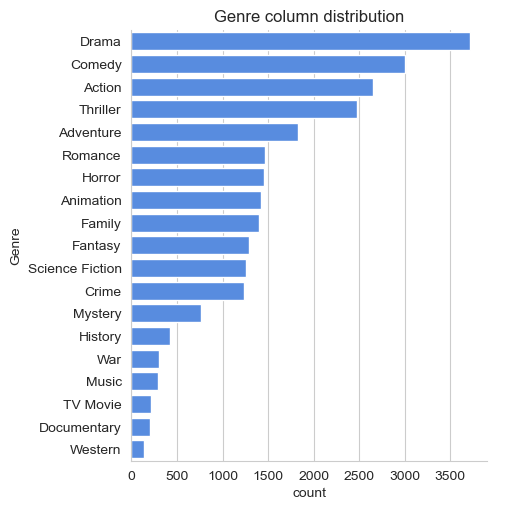

In [66]:
sns.catplot(y='Genre', data=df, kind='count', 
            order= df['Genre'].value_counts().index,
            color='#4287f5')

plt.title('Genre column distribution')
plt.show()

**Which has highest voted in vote_avg column?**

In [63]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction
3,2022,The Batman,3827.658,1151.0,popular,Crime
4,2022,The Batman,3827.658,1151.0,popular,Mystery


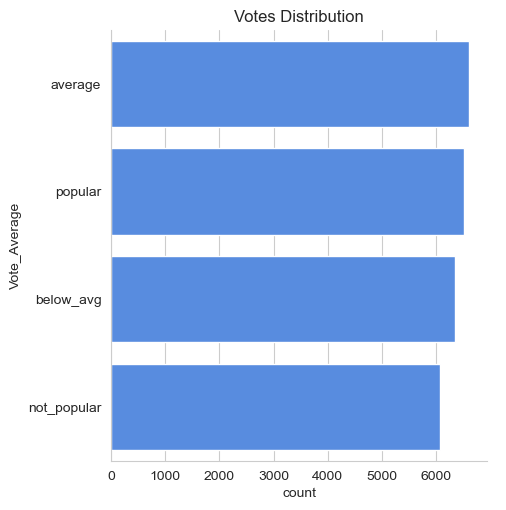

In [68]:
sns.catplot(y='Vote_Average', data = df, kind ='count',
            order= df['Vote_Average'].value_counts().index,
            color= '#4287f5')

plt.title('Votes Distribution')
plt.show()

**Which movie the highest popularity and what is it's genre?**

In [ ]:
df[df['Popularity'] == df['Popularity'].max()]#compute the col having max popularity value and cpmapre each value with it 

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940.0,popular,Science Fiction


**Which movie have lowest popularity and what is its Genre?**

In [70]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152.0,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152.0,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152.0,average,History
25548,1984,Threads,13.354,186.0,popular,War
25549,1984,Threads,13.354,186.0,popular,Drama
25550,1984,Threads,13.354,186.0,popular,Science Fiction


**Which year have most filmed movies?**

<function matplotlib.pyplot.show(close=None, block=None)>

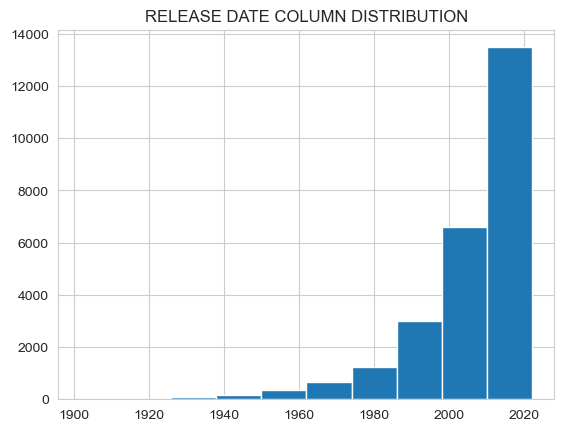

In [71]:
df['Release_Date'].hist() #we will make a histogram
plt.title('RELEASE DATE COLUMN DISTRIBUTION')
plt.show

## Summary

1. Drama genre is the most frequent genre in our dataset and has appeared more than 14% of the time amoung 19 other genre.

2. We have 25.5% of our dataset with popular vote (6520 rows).Drama again gets the highest popularity amoung fans by being having more than 18.5% of the movies popularities.

3. 'Spider-Man: No way home' has highest popularity, its genre is of 'action', 'adventure', 'science fiction'.

4. 'The united states' & 'thread' has the lowest rate in our dataset and its genre is of 'music', 'war', 'drama', 'sci-fi' and 'history'.

5. Year 2020 has the heighest filmed movie 